In [2]:
# baggin implementations

In [1]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# For simplicity, we are going to use as base estimator a Decision Tree with fixed parameters
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:
# base_estimator = DecisionTree
# n_estimators = 5 : it's gonna be created 5 subsets to train 5 Decision Tree models
# max_samples = 50 : it's gonna be taken randomly 50 items with replacement
# bootstrap = True : means that the sampling is gonna be with replacement
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

Train score: 0.9436619718309859
Test score: 0.965034965034965


In [3]:
#adaboost implementation

In [4]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)

# AdaBoost initialization
# It's defined the decision tree as the base learner
# The number of estimators will be 5
# The penalizer for the weights of each estimator is 0.1
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(x_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(x_train, y_train)}")
print(f"Test score: {adaboost.score(x_test, y_test)}")

Train score: 0.9694835680751174
Test score: 0.958041958041958


In [5]:
# gradient boosting

In [6]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# Gradient Boosting initialization
# The base learner is a decision tree as default
# The number of estimators is 5
# The depth for each deciion tree is 2
# The learning rate for each estimator in the sequence is 1
gradientBoosting = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_depth=2, random_state=23)

# Train!
gradientBoosting.fit(x_train, y_train)

# Evaluation
print(f"Train score: {gradientBoosting.score(x_train, y_train)}")
print(f"Test score: {gradientBoosting.score(x_test, y_test)}")

Train score: 0.9906103286384976
Test score: 0.965034965034965


In [7]:
#dsc10

In [8]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [10]:
X.shape

(178, 13)

In [11]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [16]:
df=X.join(pd.Series(y,name="class"))

In [15]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\bt3123\AppData\Local\Temp/ipykernel_3416/3626696802.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


class_0     class_1     class_2
alcohol                         13.744746   12.278732   13.153750
malic_acid                       2.010678    1.932676    3.333750
ash                              2.455593    2.244789    2.437083
alcalinity_of_ash               17.037288   20.238028   21.416667
magnesium                      106.338983   94.549296   99.312500
total_phenols                    2.840169    2.258873    1.678750
flavanoids                       2.982373    2.080845    0.781458
nonflavanoid_phenols             0.290000    0.363662    0.447500
proanthocyanins                  1.899322    1.630282    1.153542
color_intensity                  5.528305    3.086620    7.396250
hue                              1.062034    1.056282    0.682708
od280/od315_of_diluted_wines     3.157797    2.785352    1.683542
proline                       1115.711864  519.507042  629.895833

class_feature_means=pd.DataFrame(columns=wine.target_names)

for c,rows in df.groupby("class"):
    class_feature_means[c]=rows.mean()
class_feature_means

In [23]:
within_class_scatter_matrix=np.zeros((13,13))
for c, rows in df.groupby("class"):
    rows=rows.drop(["class"],axis=1)
    s=np.zeros((13,13))
for index,row in rows.iterrows():
    x,mc=row.values.reshape(13,1),class_feature_means[c].values.reshape(13,1)
    s += (x-mc).dot((x-mc).T)
    within_class_scatter_matrix +=s
    

In [37]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:
    n = len(df.loc[df["class"] == c].index)
    mc,m = class_feature_means[c].values.reshape(13,1),feature_means.values.reshape(13,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc-m).T)

C:\Users\bt3123\AppData\Local\Temp/ipykernel_3416/2142470010.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = df.mean()


In [39]:
eigen_values,eigen_vectors=np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [40]:
pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs=sorted(pairs,key=lambda x: x[0],reverse=True)
for pair in pairs:
    print(pair[0])

9.884546449232964
2.9033610617160517
1.1485617335716221e-15
1.1485617335716221e-15
4.466261759856017e-16
4.440892098500626e-16
2.8484322944535754e-16
2.760650302252109e-16
2.5845164280005576e-16
2.5845164280005576e-16
2.46107461592586e-16
2.46107461592586e-16
8.282741450113439e-17


In [41]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))


Explained Variance
Eigenvector 0: 0.7729604269322256
Eigenvector 1: 0.22703957306777453
Eigenvector 2: 8.98162371434281e-17
Eigenvector 3: 8.98162371434281e-17
Eigenvector 4: 3.492566517260154e-17
Eigenvector 5: 3.4727277271112036e-17
Eigenvector 6: 2.2274420518092937e-17
Eigenvector 7: 2.1587975201481855e-17
Eigenvector 8: 2.021062809367125e-17
Eigenvector 9: 2.021062809367125e-17
Eigenvector 10: 1.9245326992071897e-17
Eigenvector 11: 1.9245326992071897e-17
Eigenvector 12: 6.477010756467975e-18


In [42]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [43]:
X_lda = np.array(X.dot(w_matrix))

In [44]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

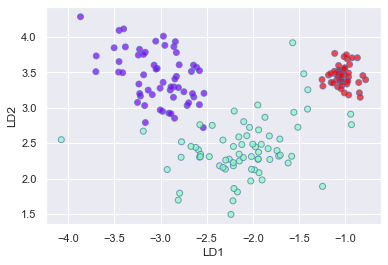

In [49]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [53]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])